# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [6]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

# to convert from list to an array
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train, y_train

(array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
         0.08497656],
        [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
         0.08627874],
        [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
         0.08471612],
        ...,
        [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
         0.95163331],
        [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
         0.95725128],
        [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
         0.93796041]]),
 array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
        0.93688146]))

### Reshaping

In [9]:
# np.reshape(X_train, (no. of stock price available, no. of timestamp, no of indicator/attributes used to predict))
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [10]:
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout

### Initialising the RNN

In [11]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

Why to add Dropout regularisation because to avoid over_fitting

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

### Adding the output layer

In [16]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [17]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [18]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0487
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0069
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0059
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - l

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [19]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [20]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting the predicted stock price of 2017

In [21]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

# to convert from list to an array
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [22]:
predicted_stock_price

array([[768.73206],
       [765.8732 ],
       [765.8997 ],
       [767.6422 ],
       [771.2599 ],
       [777.0871 ],
       [782.41345],
       [784.4236 ],
       [784.1653 ],
       [783.42365],
       [783.18823],
       [783.3547 ],
       [783.603  ],
       [784.2584 ],
       [785.1565 ],
       [789.32526],
       [796.11035],
       [803.5194 ],
       [807.4781 ],
       [803.2236 ]], dtype=float32)

### Visualising the results

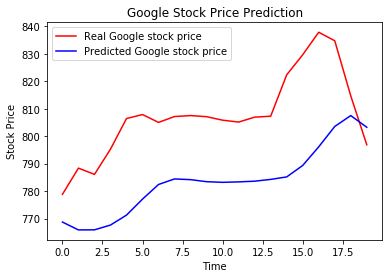

In [23]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google stock price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()